# Pillow library (PIL) image processing


#### Faris D. Qadri





concat images

## Before we start

The Python Imaging Library adds image processing capabilities to your Python interpreter.

This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.

The core image library is designed for fast access to data stored in a few basic pixel formats. It should provide a solid foundation for a general image processing tool.

Within this notebook I compiled some of the most useful basic knowledege to use it.

## Libraries + Concat func

In [7]:
# Required libraries
from PIL import Image
from PIL import ImageOps

import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Concatination function
def get_concat_h(im1, im2): 
    dst = Image.new("RGB", (im1.width + im2.width, im1.height)) # Takes the width of both images (side by side)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Importing image

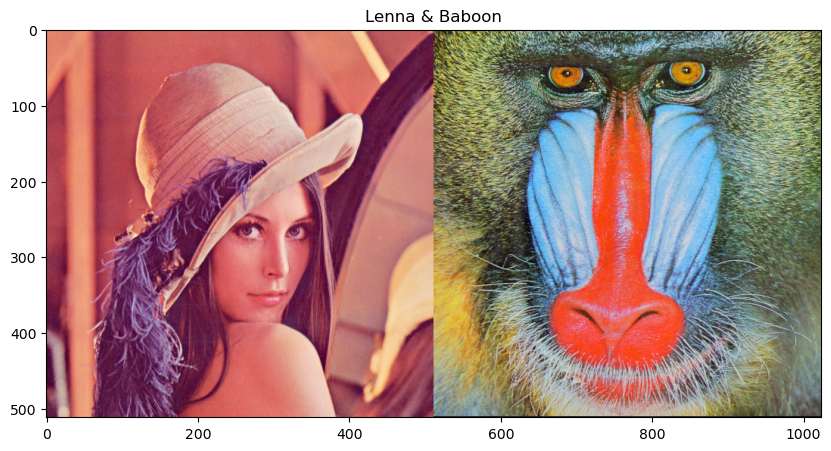

In [30]:
# using PIL
lenna = Image.open("lenna.png")
baboon= Image.open("baboon.png")

# lenna
plt.figure(figsize=(10,10))
plt.imshow(get_concat_h(lenna, baboon))
plt.title("Lenna & Baboon")
plt.show()

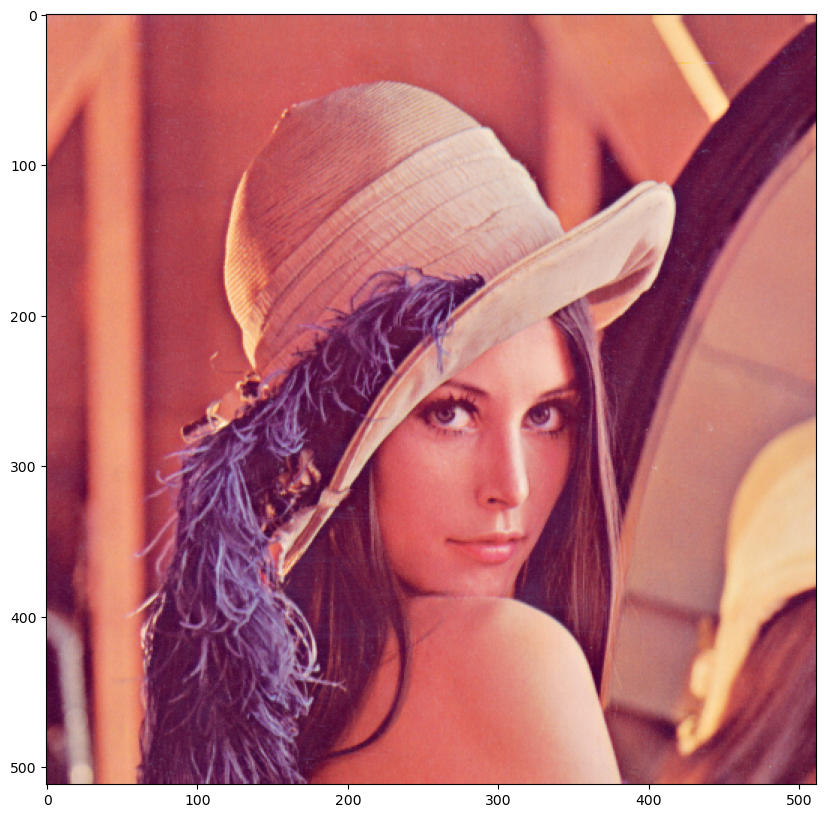

In [13]:
# Using matplotlib
plt.figure(figsize = (10, 10))
plt.imshow(lenna)
plt.show()

## Size & mode

In [19]:
print(f"""
Img size: {lenna.size}
Img mode: {lenna.mode}
To save into JPG use -> 'image.save('lenna.jpg')'
""")


Img size: (512, 512)
Img mode: RGB
To save into JPG use -> 'image.save('lenna.jpg')'



In [22]:
print(f"""
Grayscale: {ImageOps.grayscale(lenna).show()} this has mode 'L'

The Quantization of an image is the number of unique intensity values any given pixel of the image can take. 
For a grayscale image, this means the number of different shades of gray. Most images have 256 different levels. 
You can decrease the levels using the method quantize. Let's repeatably cut the number of levels in half 
and observe what happens: Half the levels do not make a noticable difference.

{ImageOps.grayscale(lenna).quantize(256 // 2).show()}
""")


Grayscale: None this has mode 'L'

The Quantization of an image is the number of unique intensity values any given pixel of the image can take. 
For a grayscale image, this means the number of different shades of gray. Most images have 256 different levels. 
You can decrease the levels using the method quantize. Let's repeatably cut the number of levels in half 
and observe what happens: Half the levels do not make a noticable difference.

None



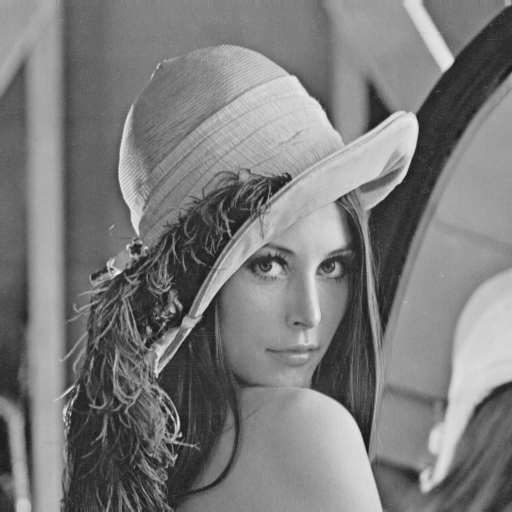

In [23]:
ImageOps.grayscale(lenna)

## Quantize
#### Maximum intensity of a pixel -> normally its 256, but its customable

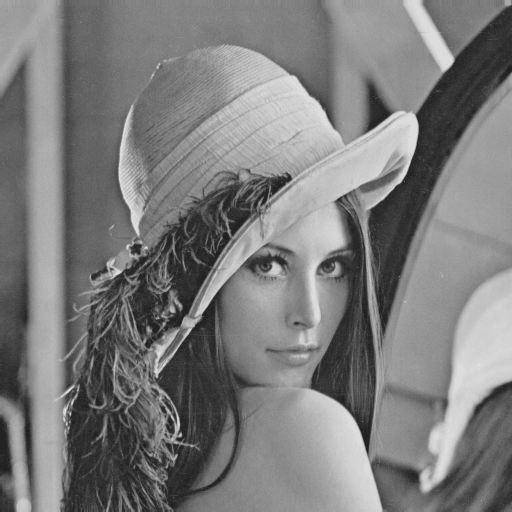

In [24]:
ImageOps.grayscale(lenna).quantize(256 // 2)

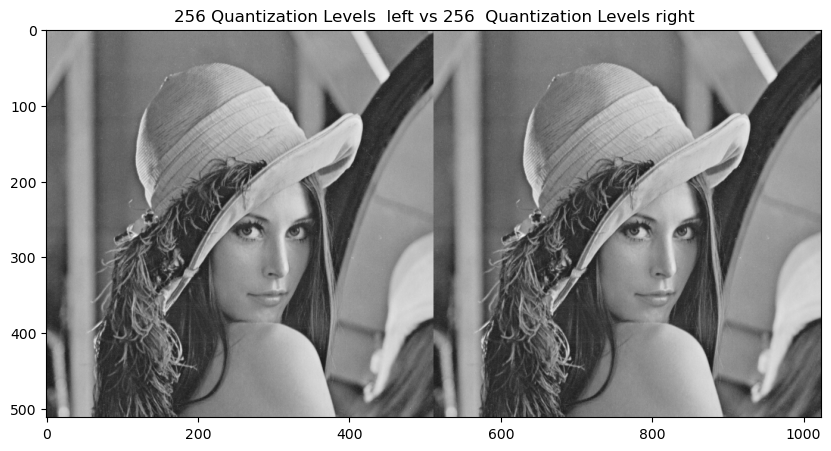

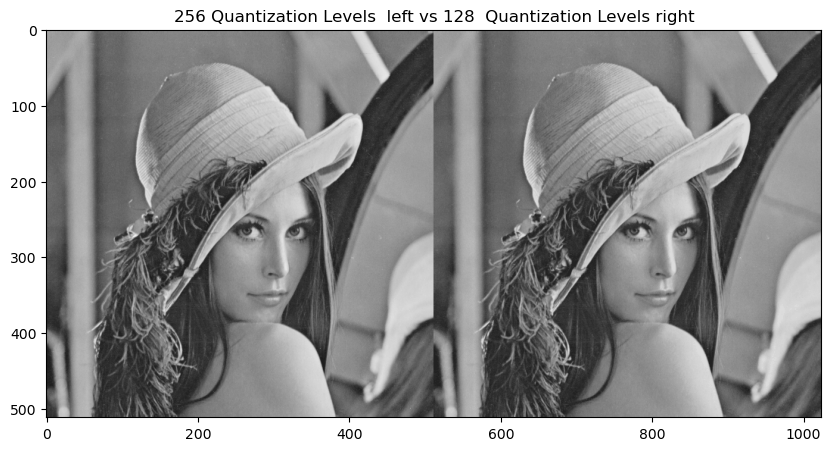

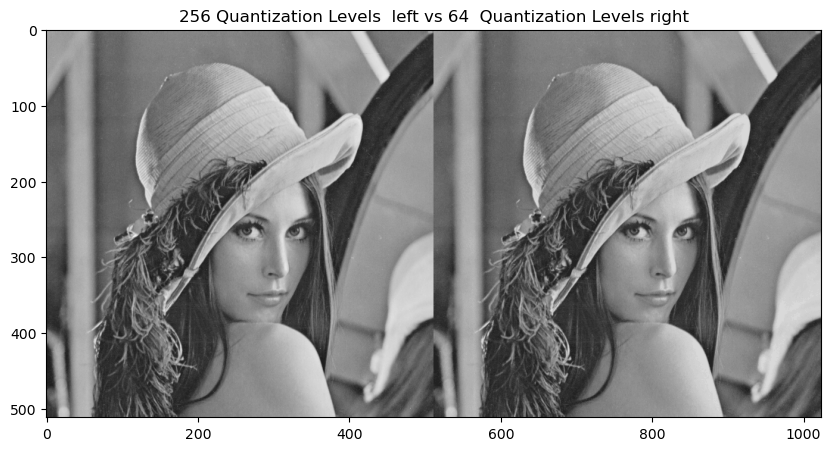

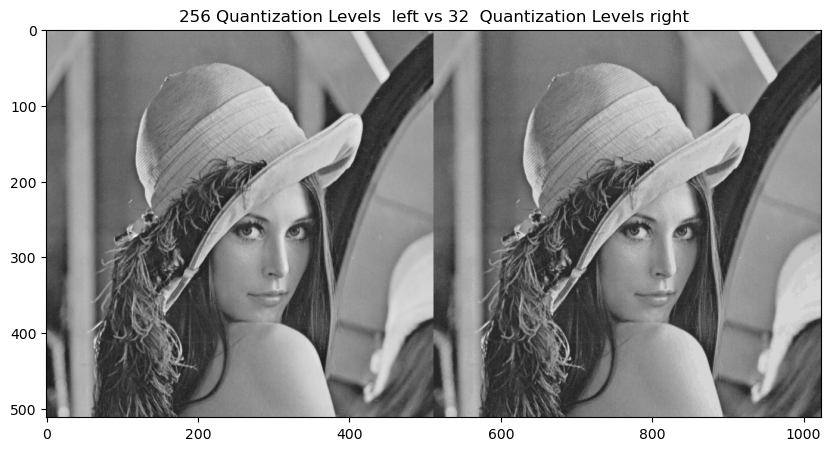

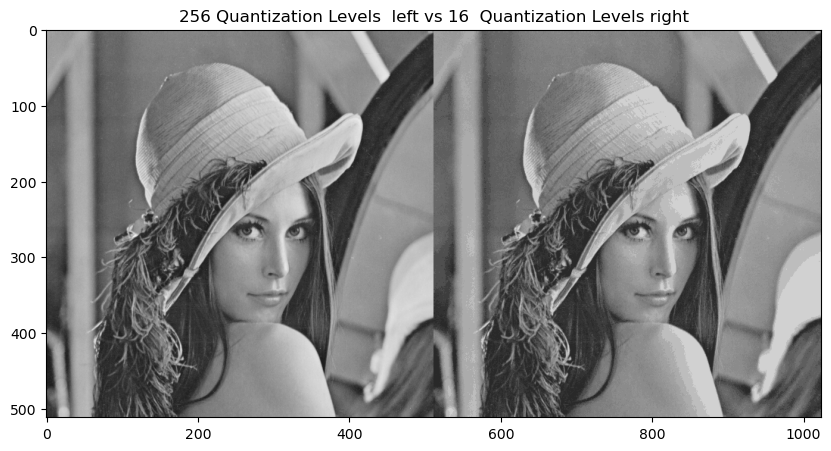

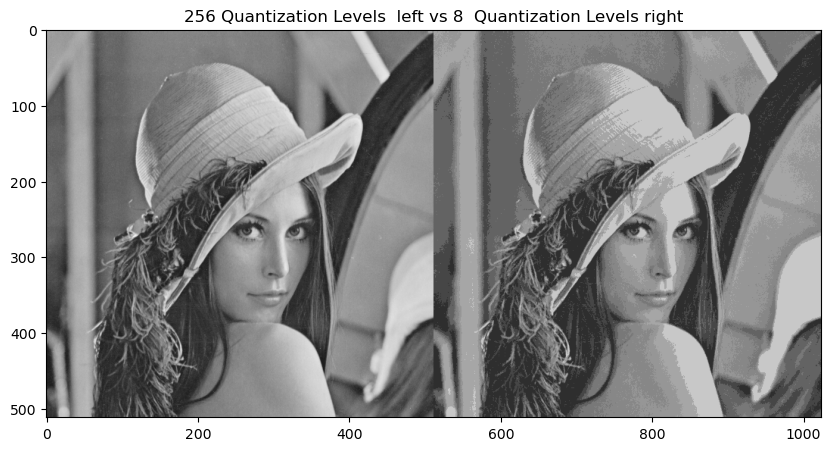

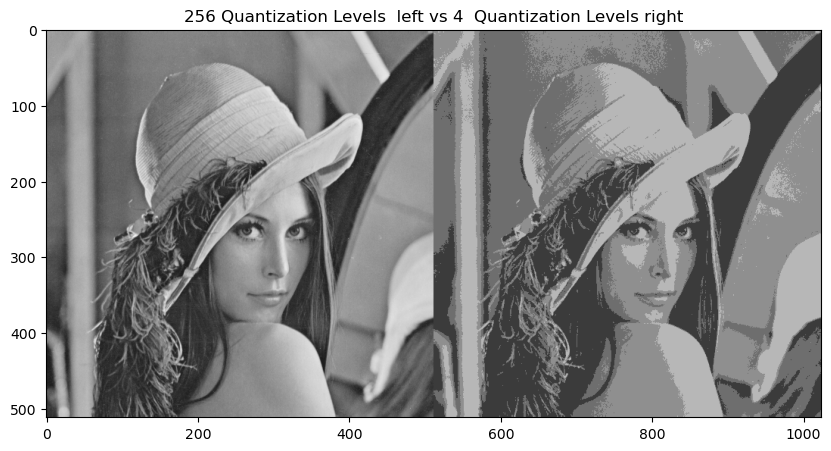

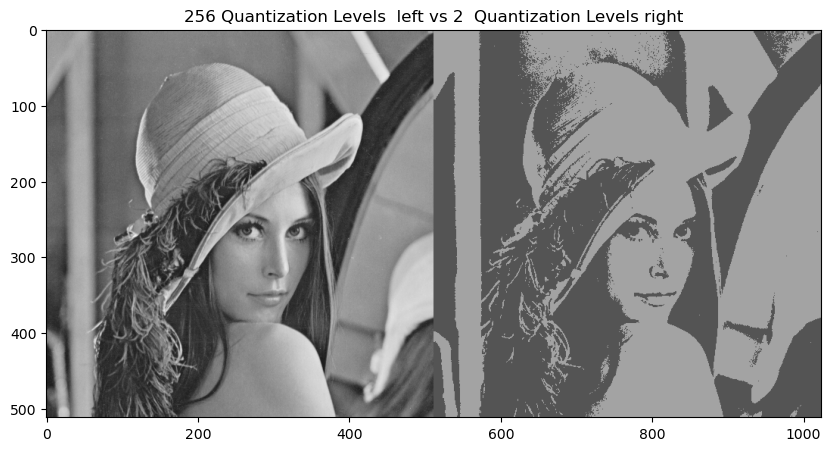

In [28]:
for i in range (8): 
    plt.figure(figsize=(10,10))
    plt.imshow(get_concat_h(ImageOps.grayscale(lenna), ImageOps.grayscale(lenna).quantize(256 // 2** i)))
    plt.title("256 Quantization Levels  left vs {}  Quantization Levels right".format(256// 2 ** i))
    plt.show()

## As a numpy array and what you can do with it

In [41]:
array_lenna = np.asarray(lenna)
array_baboon = np.array(baboon)

print(f"""
lenna array size: {array_lenna.shape}
babboon array size: {array_baboon.shape}

(x, y, z) -> size, width, dimension(RGB for PIL)

max intensity value for lenna: Red {array_lenna[:, :, 0].max()} Blue {array_lenna[:, :, 1].max()} Green {array_lenna[:, :, 2].max()}

min intensity value for lenna: Red {array_lenna[:, :, 0].min()} Blue {array_lenna[:, :, 1].min()} Green {array_lenna[:, :, 2].min()}
""")


lenna array size: (512, 512, 3)
babboon array size: (512, 512, 3)

(x, y, z) -> size, width, dimension(RGB for PIL)

max intensity value for lenna: Red 255 Blue 248 Green 225

min intensity value for lenna: Red 54 Blue 3 Green 8



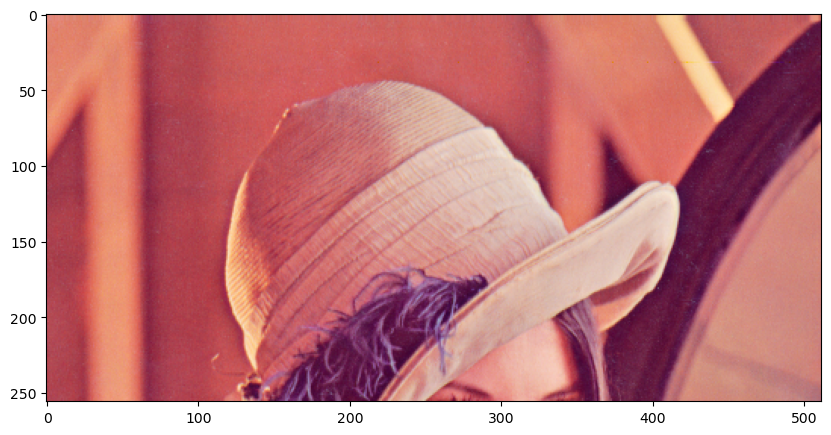

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(array_lenna[0:256,:,:])
plt.show()

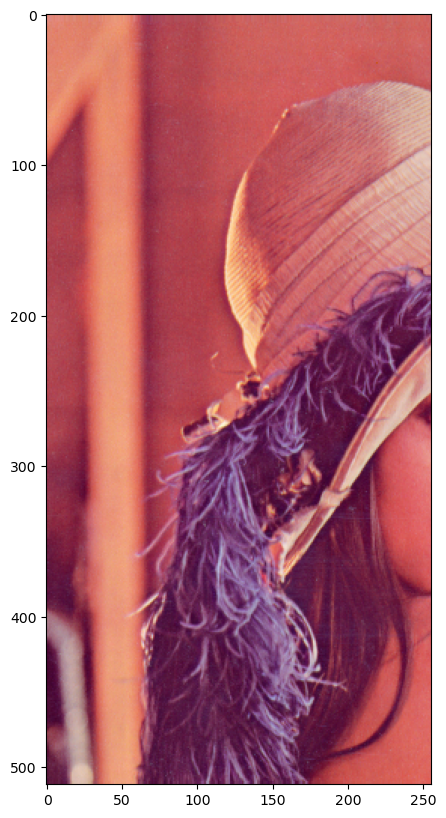

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(array_lenna[:,:256,:])
plt.show()

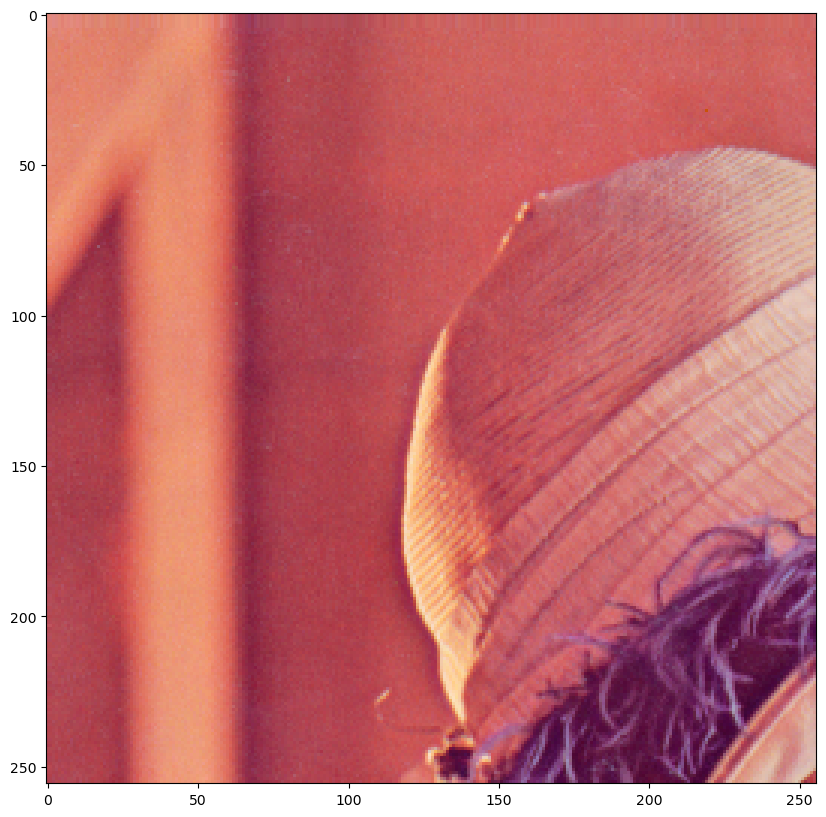

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(array_lenna[:256,:256,:])
plt.show()

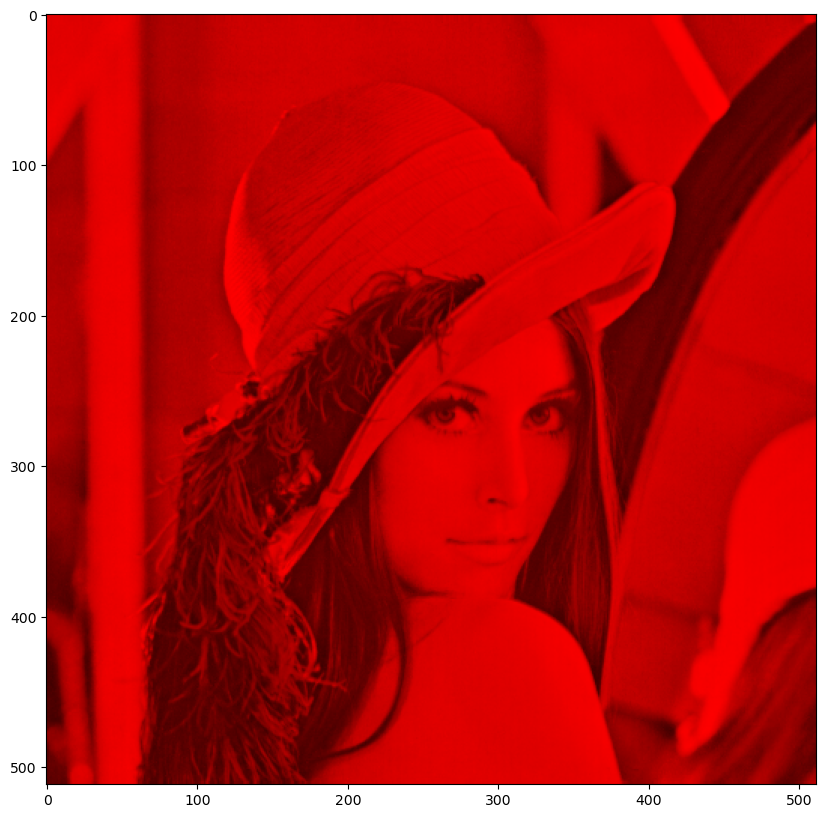

In [54]:
lenna_red = array_lenna.copy()
lenna_red[:, :, 1] = 0
lenna_red[:, :, 2] = 0

# plot
plt.figure(figsize=(10,10))
plt.imshow(lenna_red)
plt.show()

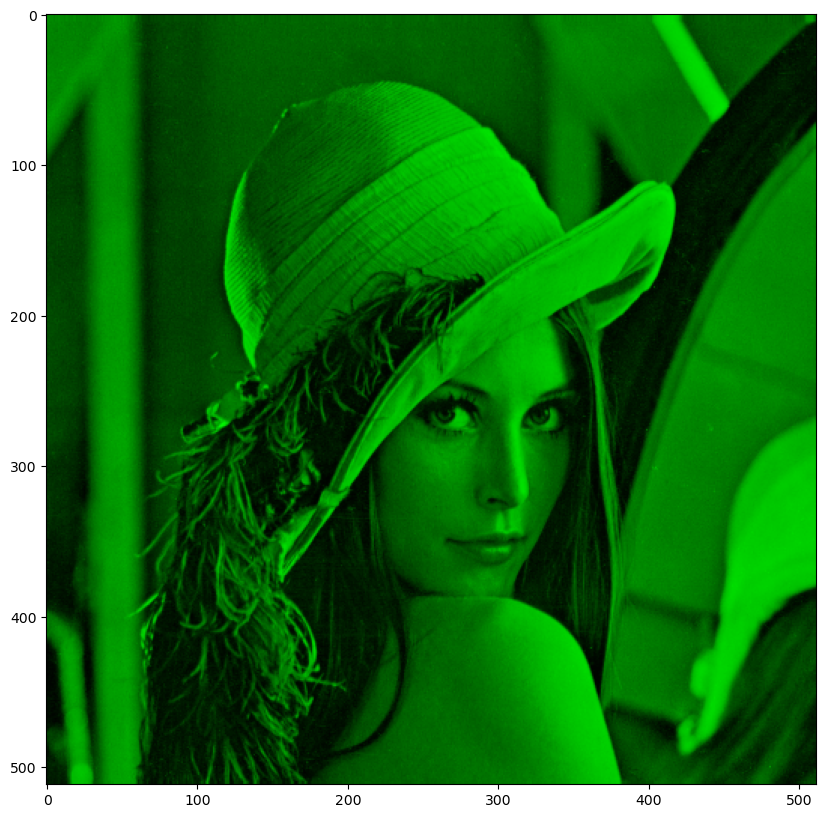

In [55]:
lenna_green = array_lenna.copy()
lenna_green[:, :, 0] = 0
lenna_green[:, :, 2] = 0

# plot
plt.figure(figsize=(10,10))
plt.imshow(lenna_green)
plt.show()

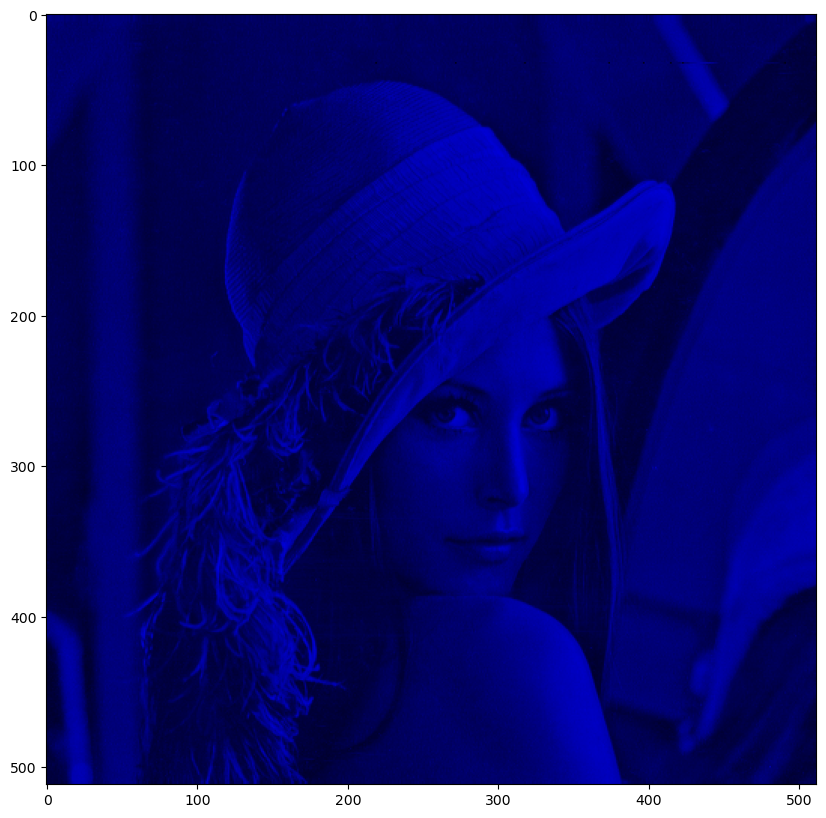

In [56]:
lenna_blue = array_lenna.copy()
lenna_blue[:, :, 0] = 0
lenna_blue[:, :, 1] = 0

# plot
plt.figure(figsize=(10,10))
plt.imshow(lenna_blue)
plt.show()